In [36]:
#libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

# Exploring the cost of refueling an combustible engine versus an electrical car. The data for electrical cars was taken from https://ev-database.org. The data for gasoline combustible cars was taken from Carvana.

## Data Involving Vehicles (Electrical, Gasoline Powered)

### Exploring the data for electrical cars

In [37]:
evCars = pd.read_excel("Electrical Car Data Set.xlsx")
evCars

,make,model,useableBattery,date Avaiblible,towing?,towing Weight,Transmission,plug Type,body Type,seats,how fast 0-60 (s),Top Speed (mph),Range (mi),efficiency (Wh/mi),fast Charge (mph),priceGermany,priceNeatherlands,priceUK,url
0,Tesla,Model Y Long Range Dual Motor,75.0,February 2022,Towbar possible,1600.0,All Wheel Drive,Type 2 CCS,SUV,5,5.0,135,270,278,420.0,"€59,017","€54,993","£52,990",https://ev-database.org/imp/car/1619/Tesla-Mod...
1,Tesla,Model 3,57.5,December 2021,Towbar possible,1000.0,Rear Wheel Drive,Type 2 CCS,Sedan,5,6.1,140,235,245,390.0,"€46,667","€45,993","£42,990",https://ev-database.org/imp/car/1555/Tesla-Mod...
2,Tesla,Model Y,57.5,November 2022,Towbar possible,1600.0,Rear Wheel Drive,Type 2 CCS,SUV,5,6.9,135,215,267,360.0,"€47,567","€47,993","£44,990",https://ev-database.org/imp/car/1743/Tesla-Mod...
3,Tesla,Model 3 Long Range Dual Motor,75.0,November 2021,Towbar possible,1000.0,All Wheel Drive,Type 2 CCS,Sedan,5,4.4,145,300,250,460.0,"€56,667","€53,993","£50,990",https://ev-database.org/imp/car/1591/Tesla-Mod...
4,BYD,ATTO 3,60.0,August 2022,NaN,NaN,Front Wheel Drive,Type 2 CCS,SUV,5,7.3,99,200,300,190.0,"€44,625","€42,998","£36,490",https://ev-database.org/imp/car/1782/BYD-ATTO-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Opel,Vivaro-e Combi L 75 kWh,68.0,October 2020,Towbar possible,1000.0,Front Wheel Drive,Type 2 CCS,SPV,9,13.3,81,160,425,170.0,"€57,775","€56,911",NaN,https://ev-database.org/imp/car/1603/Opel-Viva...
295,Mercedes,EQV 250 Extra-Long,60.0,October 2021,NaN,NaN,Front Wheel Drive,Type 2 CCS,SPV,7,12.0,99,125,480,110.0,"€68,949",NaN,NaN,https://ev-database.org/imp/car/1543/Mercedes-...
296,Citroen,e-SpaceTourer XL 50 kWh,45.0,November 2020,Towbar possible,1000.0,Front Wheel Drive,Type 2 CCS,SPV,9,12.1,81,110,409,170.0,"€54,430","€59,364","£48,335",https://ev-database.org/imp/car/1342/Citroen-e...
297,Citroen,e-Jumpy Combi XL 50 kWh,45.0,November 2020,Towbar possible,1000.0,Front Wheel Drive,Type 2 CCS,SPV,9,12.1,81,110,409,170.0,"€52,730","€50,289","£35,995",https://ev-database.org/imp/car/1596/Citroen-e...


In [38]:
averageBattery = evCars["useableBattery"].median()
print("Average Battery Size: {} KWh".format(averageBattery))

Average Battery Size: 71.0 KWh


In [39]:
averageRange = evCars["Range (mi)"].median()
print("Average Range: {} mi".format(averageRange))

Average Range: 225.0 mi


### Exploring the data for gasoline cars

In [40]:
data = pd.read_excel("Carvana Data Set -- Final Final Fix- Los Angeles, CA.xlsx")
gasCars = data.query('fuelType=="Gas"')
gasCars = gasCars.dropna(subset = ['mpgCity'])
gasCars = gasCars.dropna(subset = ['mpgHWY'])

In [41]:
averageCityMPG = gasCars["mpgCity"].median()
averageHWYMPG = gasCars["mpgHWY"].median()
print("Average HWY MPG: {} MPG".format(averageHWYMPG))
print("Average City MPG: {} MPG".format(averageCityMPG))

Average HWY MPG: 29.0 MPG
Average City MPG: 22.0 MPG


In [42]:
averageMPG = (averageCityMPG+averageHWYMPG)/2
print("Average MPG: {} MPG".format(averageMPG))

Average MPG: 25.5 MPG


## Data Involving Fuel Costs

### exploring the electrical residential cost by ultilities

Focused on CPCUC - CAlifornia electricity rates rather than the average from EIA <br> <b>Links<b> <br>https://www.cpuc.ca.gov/industries-and-topics/electrical-energy/electric-rates <br>https://www.cpuc.ca.gov/industries-and-topics/electrical-energy/electric-costs/historical-electric-cost-data/bundled-system-average <br> https://www.eia.gov/electricity/data/state/<br> https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.eia.gov%2Felectricity%2Fdata%2Fstate%2Fxls%2F861m%2FHS861M%25202010-.xlsx&wdOrigin=BROWSELINK <br>
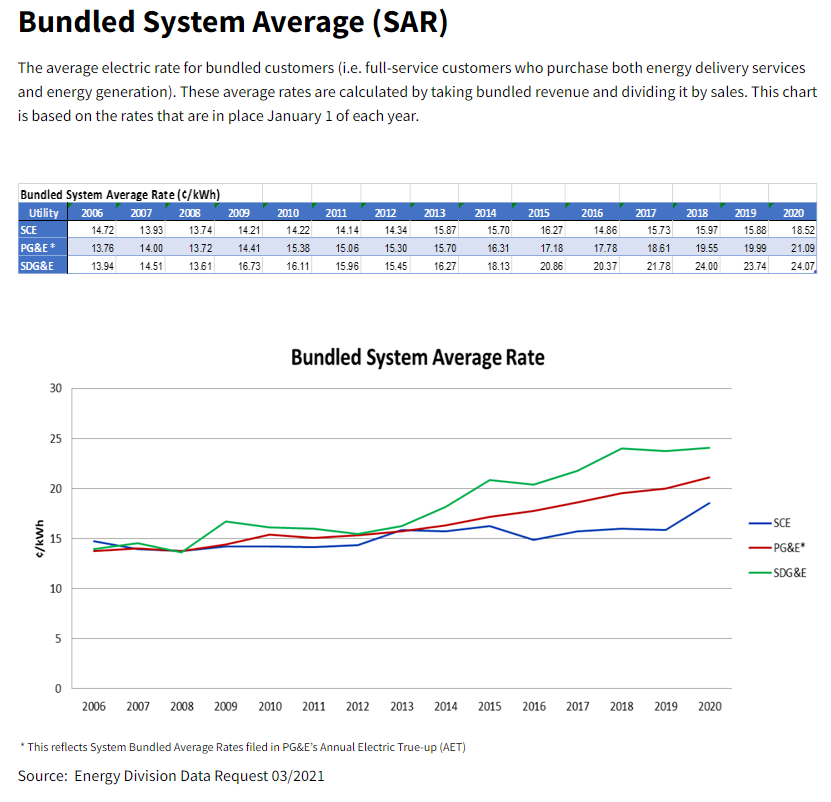

In [43]:
averageCost_per_KWH = 0.2407
print("Average Cost per KWH: ($) {}".format(averageCost_per_KWH))

Average Cost per KWH: ($) 0.2407


### exploring gasoline cost by locations

<b>Links<b> <br>https://www.eia.gov/dnav/pet/pet_pri_gnd_dcus_r50_w.htm
    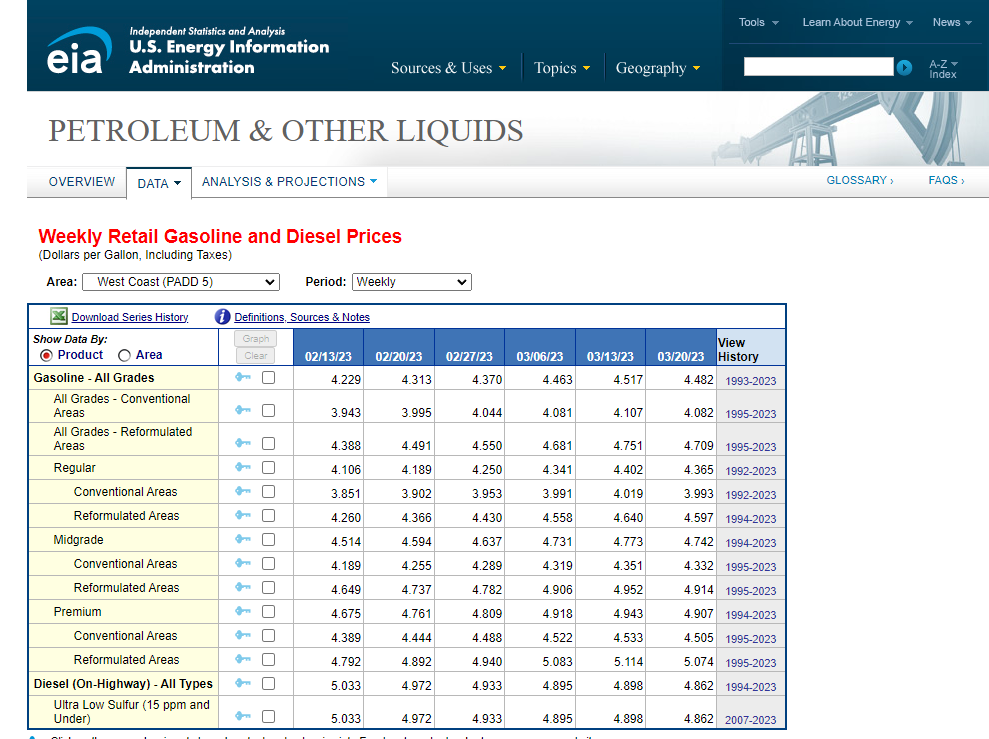

In [1]:
averageCost_gasoline_per_gallon = 4.482
print("Average Cost per Gallon of Gasoline: ($) {}".format(averageCost_gasoline_per_gallon))

Average Cost per Gallon of Gasoline: ($) 4.482


## Exploring Conumser behavior, Commuting Mileage

<b>Links<b> <br>https://afdc.energy.gov/data/10309<br> *Last Updated: Feburary 2020
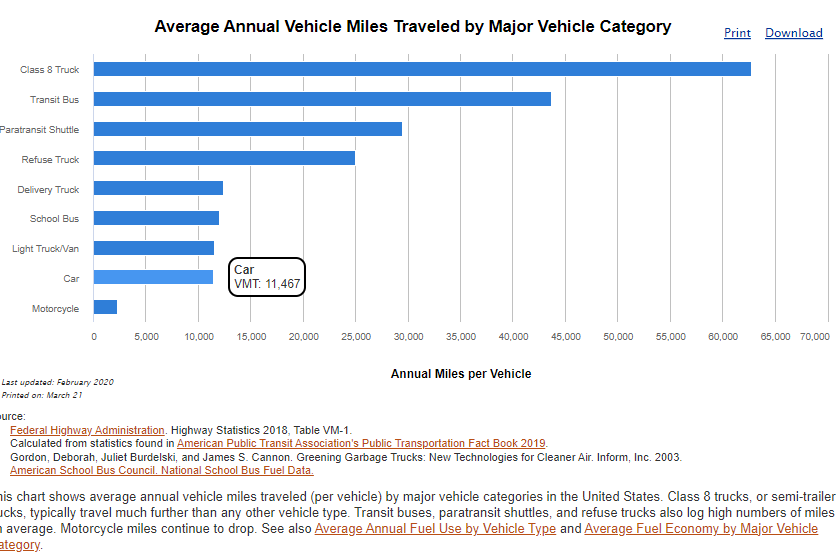

In [45]:
average_YearlyMileage = 11467
print("Average Yearly Mileage: {}, mi".format(average_YearlyMileage))

Average Yearly Mileage: 11467, mi


### Explore Costs

In [46]:
electricalCost = (average_YearlyMileage/averageRange)*averageBattery*averageCost_per_KWH
print("Cost to operate an Electrical Car, Annually,: ($) {}".format(electricalCost))

Cost to operate an Electrical Car, Annually,: ($) 870.9670662222222


In [47]:
gasolineCost = (average_YearlyMileage/averageMPG)*averageCost_gasoline_per_gallon
print("Cost to operate an Gasoline Car, Annually,: ($) {}".format(gasolineCost))

Cost to operate an Gasoline Car, Annually,: ($) 2015.4938823529412
